# Naive Bayes homework with Yelp review text

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 2

Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [2]:
# filter the DataFrame using an OR condition
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

## Task 3

Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [3]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [4]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Task 4

Use CountVectorizer to create document-term matrices from X_train and X_test.

In [5]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [6]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Task 5

Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [7]:
# import/instantiate/fit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [9]:
# calculate accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.918786692759


## Task 6

Calculate the AUC.

In [10]:
# y_test contains fives and ones, which will confuse the roc_auc_score function
y_test[:10].values

array([5, 5, 5, 5, 5, 1, 1, 5, 5, 5], dtype=int64)

In [11]:
# create y_test_binary, which contains ones and zeros instead
import numpy as np
y_test_binary = np.where(y_test==5, 1, 0)
y_test_binary[:10]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [12]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [13]:
# calculate the AUC using y_test_binary and y_pred_prob
print metrics.roc_auc_score(y_test_binary, y_pred_prob)

0.940353585141


## Task 7

Plot the ROC curve.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

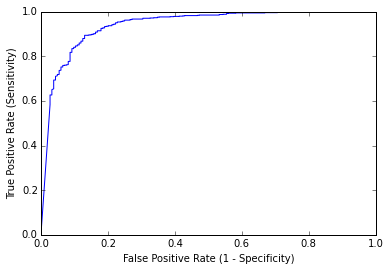

In [15]:
# plot ROC curve using y_test_binary and y_pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

## Task 8

Print the confusion matrix, and calculate the sensitivity and specificity. Comment on the results.

In [16]:
# print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[126  58]
 [ 25 813]]


In [17]:
# calculate sensitivity
813 / float(813 + 25)

0.9701670644391408

In [18]:
# calculate specificity
126 / float(126 + 58)

0.6847826086956522

The model is having a much easier time detecting five-star reviews than one-star reviews.

## Task 9

Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [19]:
# first 10 false positives (meaning they were incorrectly classified as 5-star reviews)
X_test[y_test < y_pred_class][:10]

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\r\nI brought my Mountain Bike in ...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
Name: text, dtype: object

In [20]:
# false positive: model is reacting to the words "good", "impressive", "nice"
X_test[1781]

"If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating."

In [21]:
# false positive: model had likely never seen many of these words in the training data
X_test[9984]

"Went last night to Whore Foods to get basics to make pizza with, most clutch to the process was a three pack of yeast. Low and behold, the dirty hippie kids they have working there again didn't put something in the bag.\r\n\r\nAnd this time it was the yeast.\r\n\r\nI love the food there, but the employees are nothing more than entitled hippie kids from Scottsdale who can't be bothered to do their goddamn jobs! I am so sick of this crap with this corporation. Maybe its a Phoenix thing, or maybe its the hiring and firing processes of Whore Foods, but I am done shopping at any Whore Foods. In a place like Phoenix, where you have alternatives such as Sprouts, you'd think Whore Foods would smarten up.\r\n\r\nOr when you try to ask someone who works here where something is, and they just walk by with their nose high in the air. I understand its important to show your fellow dirt merchants that you're a super star, but I don't work with you, I contribute to your salary and over inflated set 

In [22]:
# false positive: model does not have enough data to work with
X_test[1919]

'D-scust-ing.'

In [23]:
# first 10 false negatives (meaning they were incorrectly classified as 1-star reviews)
X_test[y_test > y_pred_class][:10]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
Name: text, dtype: object

In [24]:
# false negative: model is reacting to the words "complain", "crowds", "rushing", "pricey", "scum"
X_test[4963]

'This is by far my favourite department store, hands down. I have had nothing but perfect experiences in this store, without exception, no matter what department I\'m in. The shoe SA\'s will bend over backwards to help you find a specific shoe, and the staff will even go so far as to send out hand-written thank you cards to your home address after you make a purchase - big or small. Tim & Anthony in the shoe salon are fabulous beyond words! \r\n\r\nI am not completely sure that I understand why people complain about the amount of merchandise on the floor or the lack of crowds in this store. Frankly, I would rather not be bombarded with merchandise and other people. One of the things I love the most about Barney\'s is not only the prompt attention of SA\'s, but the fact that they aren\'t rushing around trying to help 35 people at once. The SA\'s at Barney\'s are incredibly friendly and will stop to have an actual conversation, regardless or whether you are purchasing something or not. I

## Task 10

Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?

In [25]:
# create a list that will store the results of the process below
results = []

# loop through the thresholds returned by the metrics.roc_curve function
for threshold in thresholds:
    
    # make a class prediction of 5 if the predicted probability is higher than the threshold
    y_pred_class = np.where(y_pred_prob > threshold, 5, 1)
    
    # generate the confusion matrix and slice it into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1][1]
    TN = confusion[0][0]
    FP = confusion[0][1]
    FN = confusion[1][0]
    
    # calculate the sensitivity and specificity
    sensitivity = TP / float(TP + FN)
    specificity = TN / float(TN + FP)
    
    # calculate the absolute difference between sensitivity and specificity
    difference = np.absolute(sensitivity - specificity)
    
    # append a tuple to the results list
    results.append((difference, sensitivity, specificity, threshold))

In [26]:
# locate the minimum difference (at which sensitivity and specificity are balanced)
min(results)

(0.0002983293556085842, 0.87470167064439142, 0.875, 0.99855196916444533)

At a threshold of approximately **0.9986**, the sensitivity and specificity are both approximately **0.875**.

## Task 10 (alternative solution)

This solution simplifies the for loop by utilizing the "fpr" and "tpr" objects returned by the `metrics.roc_curve` function.

In [27]:
# create a list that will store the results of the process below
results = []

# loop through the thresholds returned by the metrics.roc_curve function (skipping the first threshold)
for threshold in thresholds[1:]:
    
    # calculate the sensitivity and specificity
    sensitivity = tpr[thresholds > threshold][-1]
    specificity = 1 - fpr[thresholds > threshold][-1]
    
    # calculate the absolute difference between sensitivity and specificity
    difference = np.absolute(sensitivity - specificity)
    
    # append a tuple to the results list
    results.append((difference, sensitivity, specificity, threshold))

In [28]:
# locate the minimum difference (at which sensitivity and specificity are balanced)
min(results)

(0.0002983293556085842, 0.87470167064439142, 0.875, 0.99855196916444533)

## Task 11

Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:

- Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)
- Split the data into training and testing sets.
- Calculate the testing accuracy of a Naive Bayes model.
- Compare the testing accuracy with the null accuracy.
- Print the confusion matrix.
- Comment on the results.

In [29]:
# define X and y using the original DataFrame
X = yelp.text
y = yelp.stars

In [30]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [32]:
# fit a Naive Bayes model
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [34]:
# calculate the testing accuary
print metrics.accuracy_score(y_test, y_pred_class)

0.4712


In [35]:
# calculate the null accuracy
y_test.value_counts().head(1) / len(y_test)

4    0.3536
dtype: float64

In [36]:
# print the confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[ 55  14  24  65  27]
 [ 28  16  41 122  27]
 [  5   7  35 281  37]
 [  7   0  16 629 232]
 [  6   4   6 373 443]]


Comments:

- Nearly all 4-star and 5-star reviews are classified as 4 or 5 stars, but they are hard for the model to distinguish between.
- 1-star, 2-star, and 3-star reviews are often classified as 4 stars, probably because it's the predominant class in the training data.
- When the model predicts 1 or 2 stars, it's usually correct.
- 47% accuracy is relatively impressive, given that humans would also have a hard time precisely identifying the star rating for many of these reviews.